In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_excel('customer_retention.xlsx')
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [8]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [12]:
df.shape

(269, 71)

# From the above analysis what we saw is that there are no missing values in the data.

# it contains 269 number of rows and 71 columns

# the whole data is in object type data.

In [13]:
#changing the column names into short for better understanding and less time conuming
columns=['gender','age','city','pinCode','shopping_since','shopping_frequency_1year','internet_type','device',
           'screen_size','OS', 'browser','1_channel','Access','time_spent','prefered_payment_mode',
           'cancel_shopping','cancel_reason','content_readability','similar_product',
           'seller_info','product_info_clarity','navigation_ease','web_speed','UI',
           'UI_payment_mode','trust_process','customer_support','privacy_garauntee',
           'Channel_Diversity','benefit','satisfaction','convenient','Return/Replacement','loyalty_program',
         'info_satisfaction','UI_Satisfaction','net_benefit','trust','product_category','relevant_info',
         'Savings','patronizing','experience','Status','gratification','role','Worthy','platform_Used',
         'convinient_accessibility','Appealing_UI','product_diversity','product_info','performance_platform','reliable_UI',
         'navigation','payment_mode_availability','speed_delivery','customer_privacy','financial_security','trust_worthiness',
        'multi_channel','slow_login_time','slow_display_time','late_price_announcement','slow_load_time','limited_payment_mode',
         'longer_delivery_period','frequent_UI_change','frequent_page_disruption','UI_efficiency','platform_recommend']
df.columns=columns

In [14]:
df

,gender,age,city,pinCode,shopping_since,shopping_frequency_1year,internet_type,device,screen_size,OS,...,slow_login_time,slow_display_time,late_price_announcement,slow_load_time,limited_payment_mode,longer_delivery_period,frequent_UI_change,frequent_page_disruption,UI_efficiency,platform_recommend
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [15]:
df.columns

Index(['gender', 'age', 'city', 'pinCode', 'shopping_since',
       'shopping_frequency_1year', 'internet_type', 'device', 'screen_size',
       'OS', 'browser', '1_channel', 'Access', 'time_spent',
       'prefered_payment_mode', 'cancel_shopping', 'cancel_reason',
       'content_readability', 'similar_product', 'seller_info',
       'product_info_clarity', 'navigation_ease', 'web_speed', 'UI',
       'UI_payment_mode', 'trust_process', 'customer_support',
       'privacy_garauntee', 'Channel_Diversity', 'benefit', 'satisfaction',
       'convenient', 'Return/Replacement', 'loyalty_program',
       'info_satisfaction', 'UI_Satisfaction', 'net_benefit', 'trust',
       'product_category', 'relevant_info', 'Savings', 'patronizing',
       'experience', 'Status', 'gratification', 'role', 'Worthy',
       'platform_Used', 'convinient_accessibility', 'Appealing_UI',
       'product_diversity', 'product_info', 'performance_platform',
       'reliable_UI', 'navigation', 'payment_mode_availa

# we have assigned short names for the data columns to get better understanding of the data

# we have to encode the object type data into numerical to perform analysis but we already have the encoded dataset given to us 

# So we will be using the encoded dataset for the futher analysis

In [19]:
df=pd.read_excel('customer_retention_enc.csv.xlsx')
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,Solan,173212,2,1,3,1,4,2,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,Ghaziabad,201008,2,4,3,1,5,2,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,Bangalore,560010,3,1,3,2,5,1,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,Solan,173229,3,1,2,1,4,2,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [20]:
#changing the column names into short for better understanding and less time conuming
columns=['gender','age','city','pinCode','shopping_since','shopping_frequency_1year','internet_type','device',
           'screen_size','OS', 'browser','1_channel','Access','time_spent','prefered_payment_mode',
           'cancel_shopping','cancel_reason','content_readability','similar_product',
           'seller_info','product_info_clarity','navigation_ease','web_speed','UI',
           'UI_payment_mode','trust_process','customer_support','privacy_garauntee',
           'Channel_Diversity','benefit','satisfaction','convenient','Return/Replacement','loyalty_program',
         'info_satisfaction','UI_Satisfaction','net_benefit','trust','product_category','relevant_info',
         'Savings','patronizing','experience','Status','gratification','role','Worthy','platform_Used',
         'convinient_accessibility','Appealing_UI','product_diversity','product_info','performance_platform','reliable_UI',
         'navigation','payment_mode_availability','speed_delivery','customer_privacy','financial_security','trust_worthiness',
        'multi_channel','slow_login_time','slow_display_time','late_price_announcement','slow_load_time','limited_payment_mode',
         'longer_delivery_period','frequent_UI_change','frequent_page_disruption','UI_efficiency','platform_recommend']
df.columns=columns

In [22]:
df.columns

Index(['gender', 'age', 'city', 'pinCode', 'shopping_since',
       'shopping_frequency_1year', 'internet_type', 'device', 'screen_size',
       'OS', 'browser', '1_channel', 'Access', 'time_spent',
       'prefered_payment_mode', 'cancel_shopping', 'cancel_reason',
       'content_readability', 'similar_product', 'seller_info',
       'product_info_clarity', 'navigation_ease', 'web_speed', 'UI',
       'UI_payment_mode', 'trust_process', 'customer_support',
       'privacy_garauntee', 'Channel_Diversity', 'benefit', 'satisfaction',
       'convenient', 'Return/Replacement', 'loyalty_program',
       'info_satisfaction', 'UI_Satisfaction', 'net_benefit', 'trust',
       'product_category', 'relevant_info', 'Savings', 'patronizing',
       'experience', 'Status', 'gratification', 'role', 'Worthy',
       'platform_Used', 'convinient_accessibility', 'Appealing_UI',
       'product_diversity', 'product_info', 'performance_platform',
       'reliable_UI', 'navigation', 'payment_mode_availa

# we will be dropping the screen size and pincode 

# by logical reason we already have the city name and pincode does not help in a special way.
# screen size does not matter while ordering online as long as the information is readable.

In [23]:
#dropping the unwanted columns
df=df.drop(['pinCode','screen_size'],axis=1)
df

,gender,age,city,shopping_since,shopping_frequency_1year,internet_type,device,OS,browser,1_channel,...,slow_login_time,slow_display_time,late_price_announcement,slow_load_time,limited_payment_mode,longer_delivery_period,frequent_UI_change,frequent_page_disruption,UI_efficiency,platform_recommend
0,0,3,Delhi,5,4,4,3,1,1,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,5,5,2,1,3,1,1,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,4,5,3,1,2,1,1,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,4,1,3,1,3,2,1,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,3,2,2,1,3,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,Solan,2,1,3,1,2,4,4,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,Ghaziabad,2,4,3,1,2,1,1,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,Bangalore,3,1,3,2,1,1,1,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,Solan,3,1,2,1,2,1,1,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


# Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

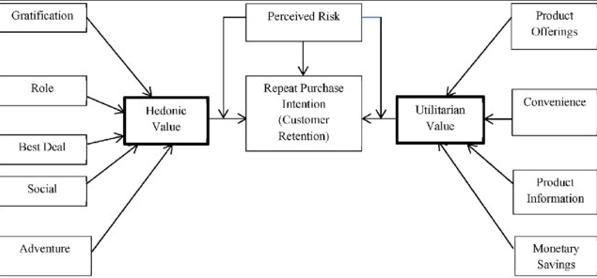

# ANALYSIS

In [40]:
df['city'].value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: city, dtype: int64

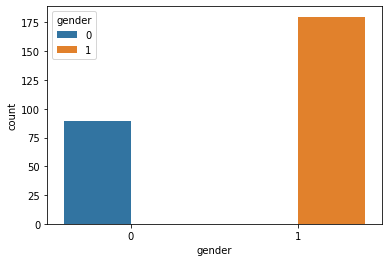

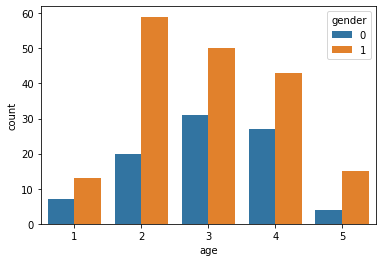

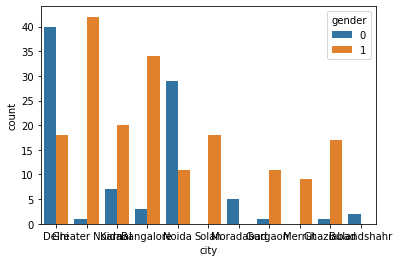

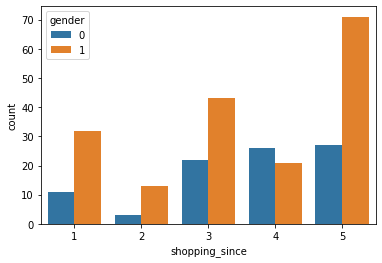

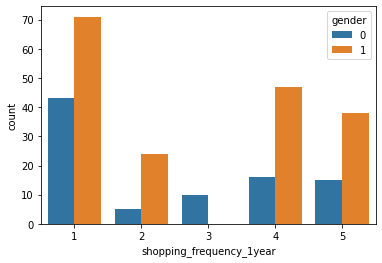

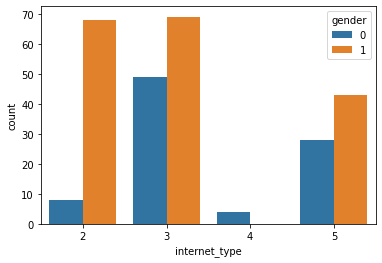

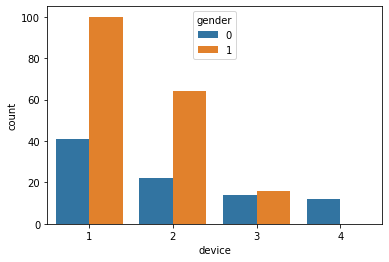

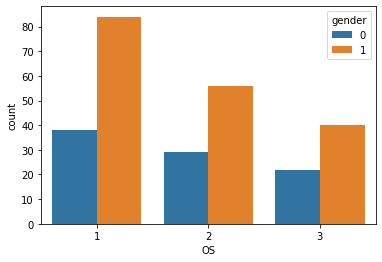

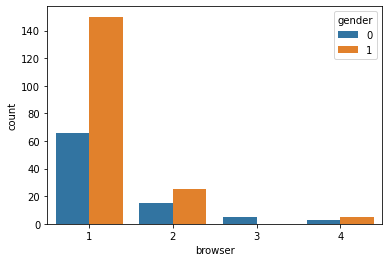

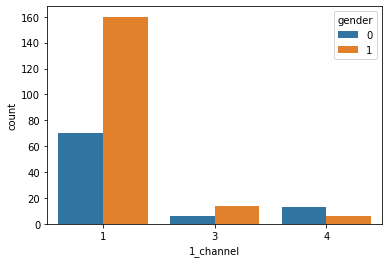

In [41]:
lis=['gender','age','city','shopping_since','shopping_frequency_1year','internet_type','device',
           'OS', 'browser','1_channel']
for i in lis:
    sns.countplot(df[i],hue='gender',data=df)
    plt.show()

# observation from the above :

# we can see the majority of online shoppers on the female side

# most number online female shoppers comes from under 21-30 age group and for male the majority shoppers comes from 31-40 age group.
# Delhi is having the highest number of male shoppers as well as the over all  majority of shoppers compared to the city. greater noida have the highest number of female online shoppers.
# majority of the people have been shopping since last 4 years. 
# the frequency of people shopping in a year is less than 10 times.
# mostly people will use smartphones to purchase products online.


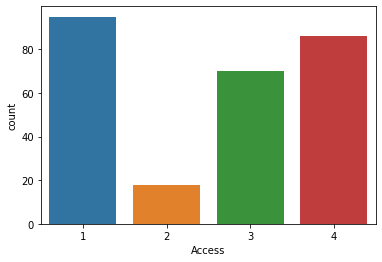

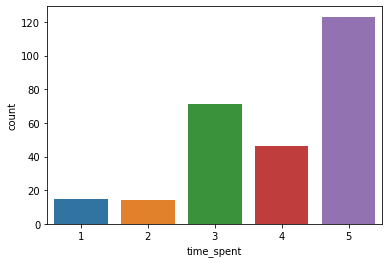

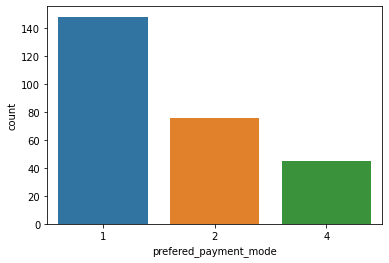

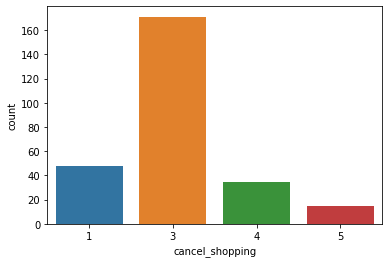

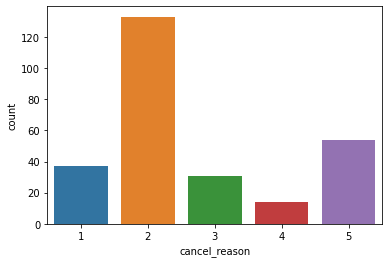

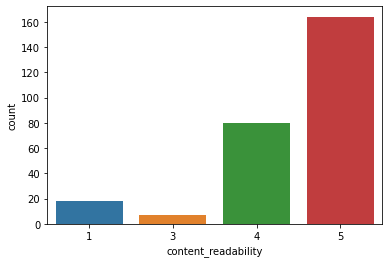

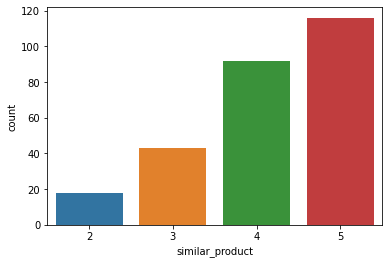

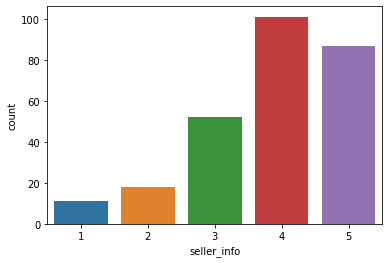

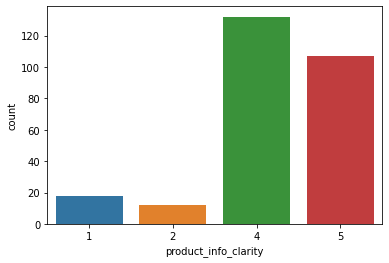

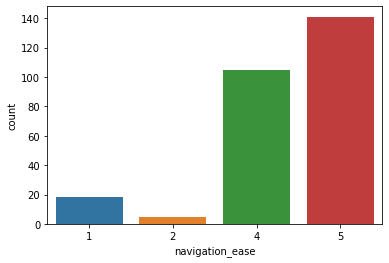

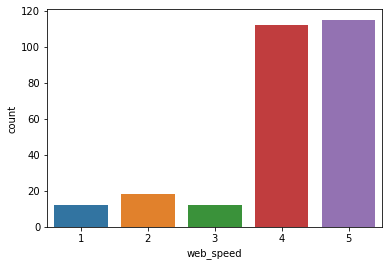

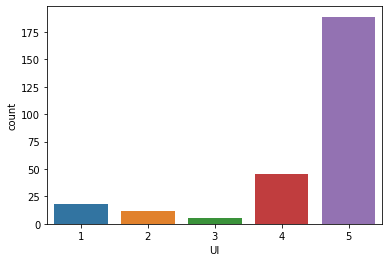

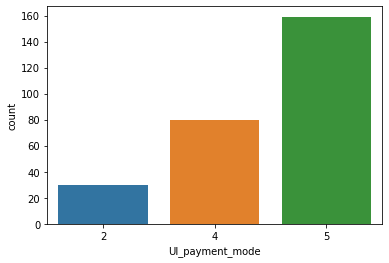

In [43]:
lis=['Access','time_spent','prefered_payment_mode',
           'cancel_shopping','cancel_reason','content_readability','similar_product',
           'seller_info','product_info_clarity','navigation_ease','web_speed','UI',
           'UI_payment_mode']
for i in lis:
    sns.countplot(df[i])
    plt.show()

# Observation from the above bar graphs:

# Generally people spent  more than 15 mins on online shopping platforms and browse through the variety of products.
# Credit cards and debit cards are mostly used for making payments online as they also offer various discounts and EMI services.
# Sometimes people also cancel some orders after placing the orders. Most of the times the reason to cancel is finding better alternative of the products on the platforms or the same platform.
# People strongly agree that similar products should be found for product comparison.
# Seller information should be mentioned says most of the people. Product details should be metioned in detail.
# People wants ease of navigation for finding products, good connectivity, user interface should be easy to understand and covenient payment methods.
# All these things helps the counsumer to do online shopping very easily.


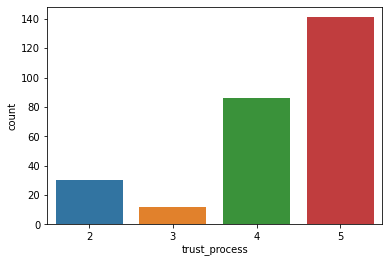

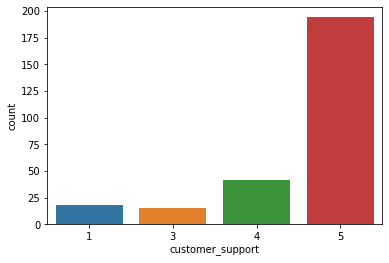

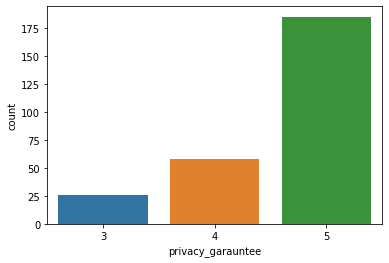

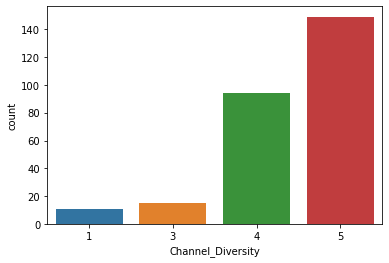

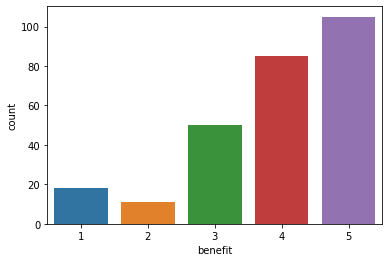

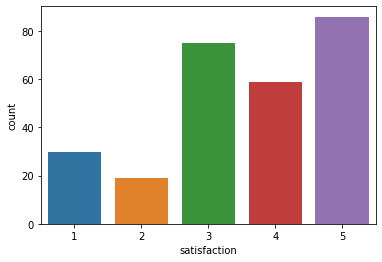

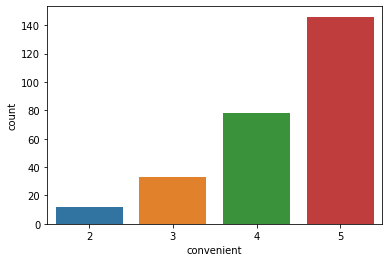

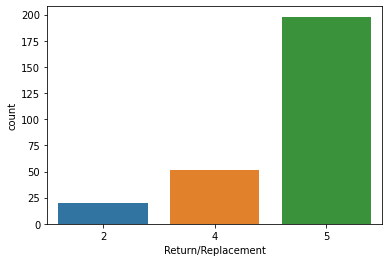

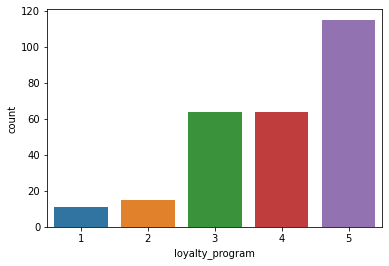

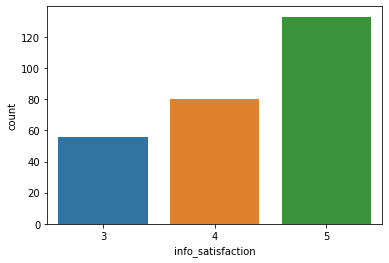

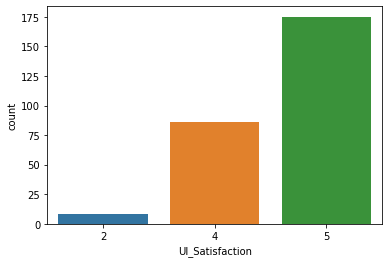

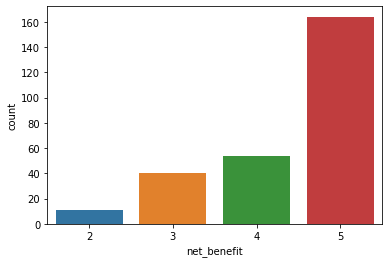

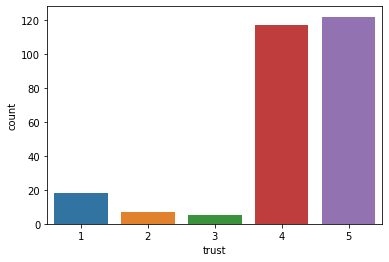

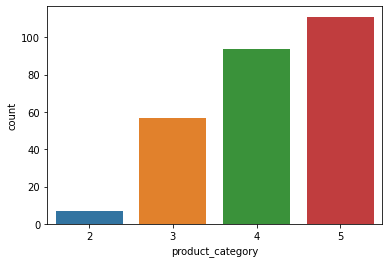

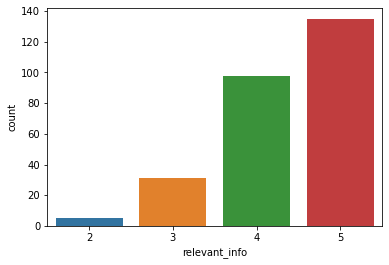

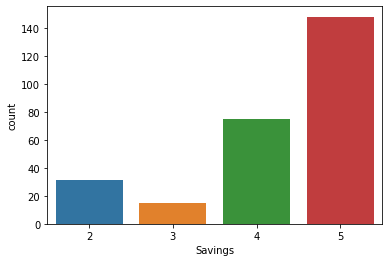

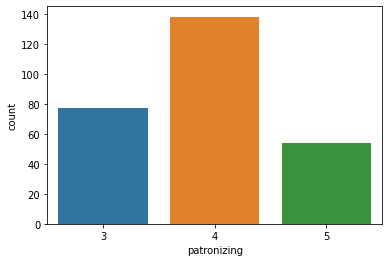

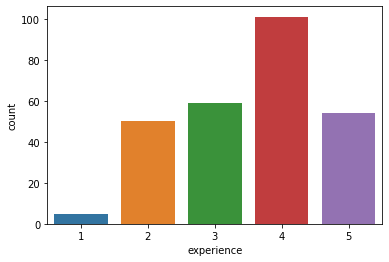

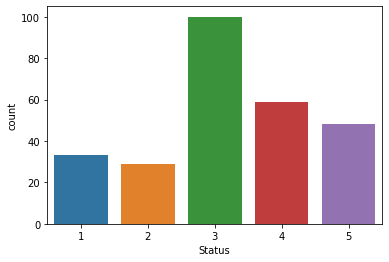

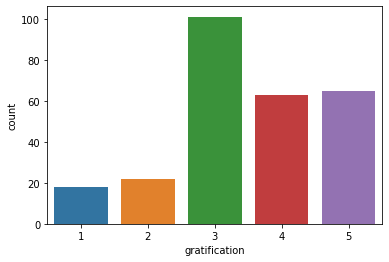

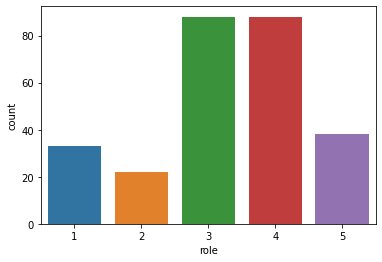

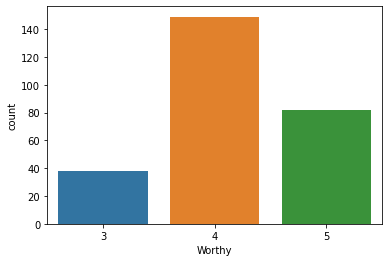

In [44]:
lis=['trust_process','customer_support','privacy_garauntee',
           'Channel_Diversity','benefit','satisfaction','convenient','Return/Replacement','loyalty_program',
         'info_satisfaction','UI_Satisfaction','net_benefit','trust','product_category','relevant_info',
         'Savings','patronizing','experience','Status','gratification','role','Worthy']
for i in lis:
    sns.countplot(df[i])
    plt.show()

# Observation from the above graphs:

# People strongly trust the idea of this online shopping and if they face any problem the platform will be ready to assist them.
# People believe that they will keep their private data safe and secure and they will be responsiveness on multiple places like email, chats,etc.
# People strongly agree that Online shopping gives monetary benefit and discounts, Enjoyment is derived from shopping online, Shopping online is convenient and flexible.
# People wants to see the return and replacement policy to be mentioned cleary and in detail before taking their decison, information of the products should be easily understandable is what improves customer satisfaction and giving them access to loyalty programs will help in customer retention.
# Users derive satisfaction while shopping on a good quality website or application.
# People find a variety of products on online websites which help tehm to take better buying decisions and help in customer satisfaction.
# People look for products which are value for money on the online platforms and help them in monetory savings.


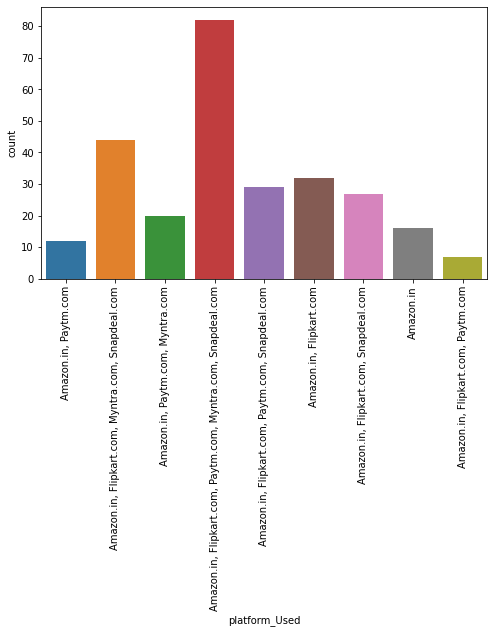

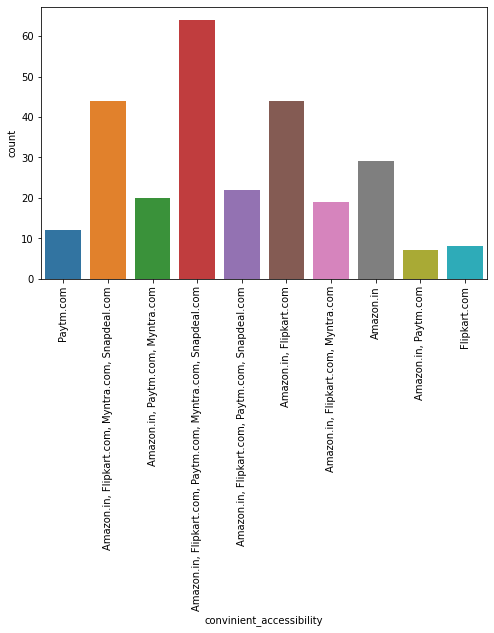

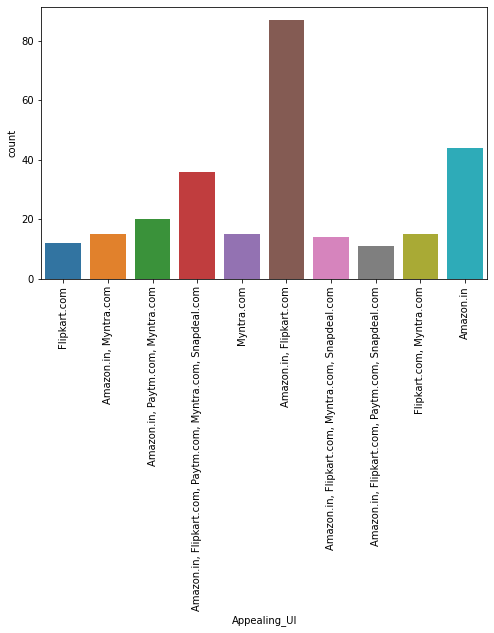

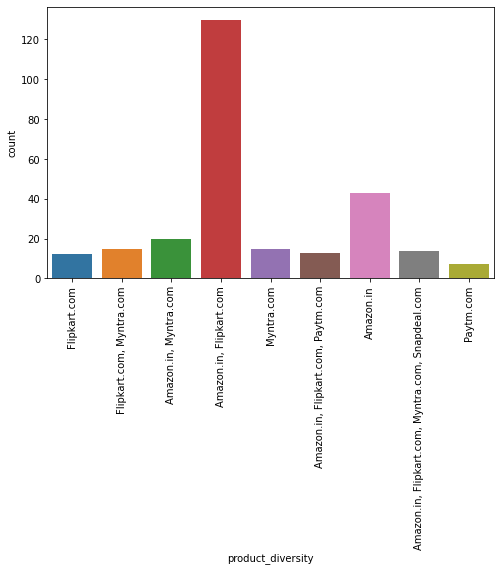

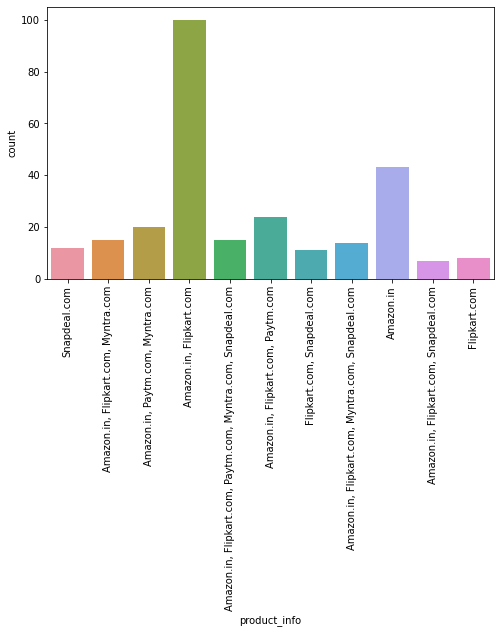

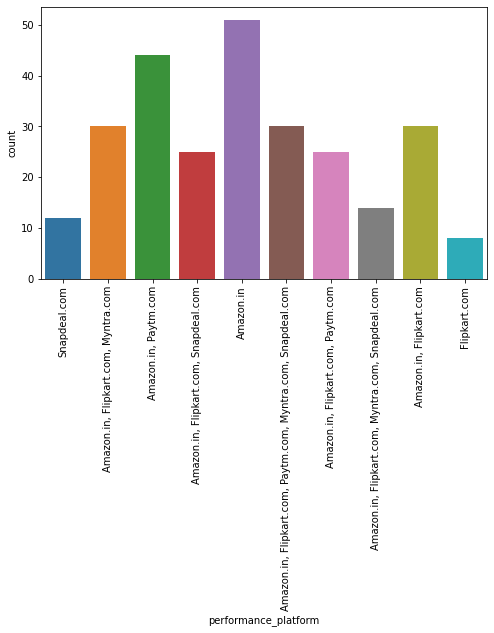

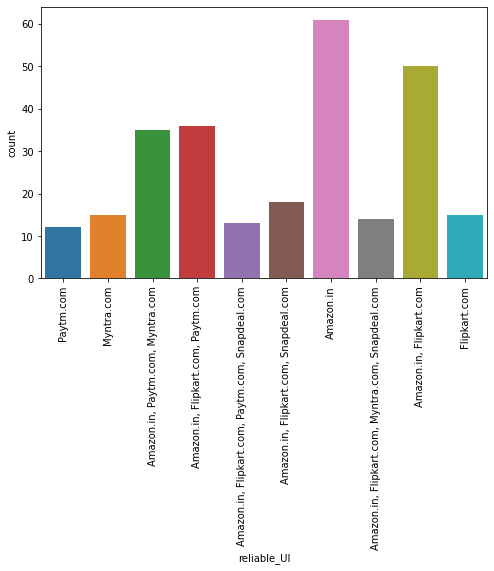

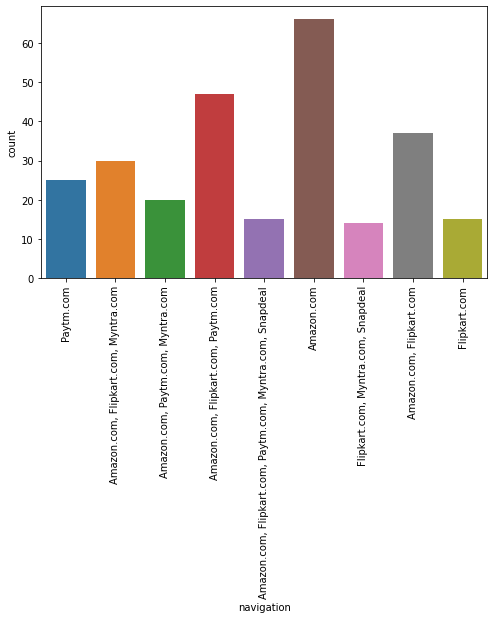

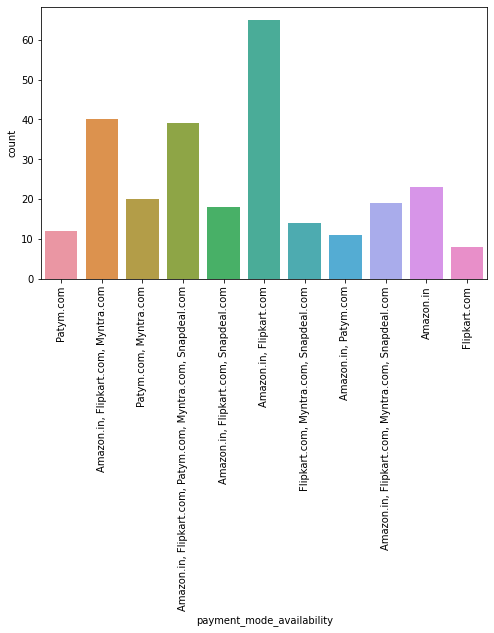

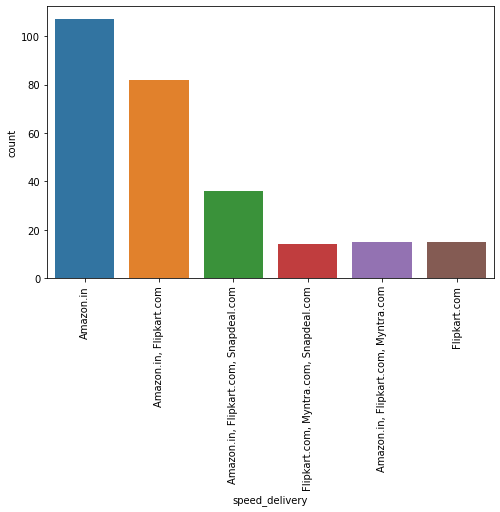

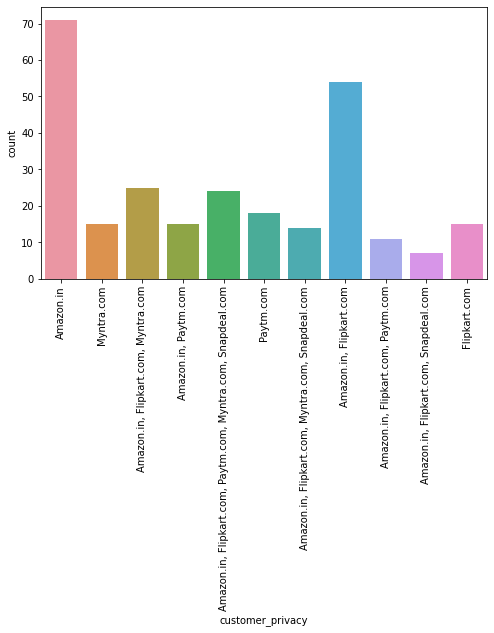

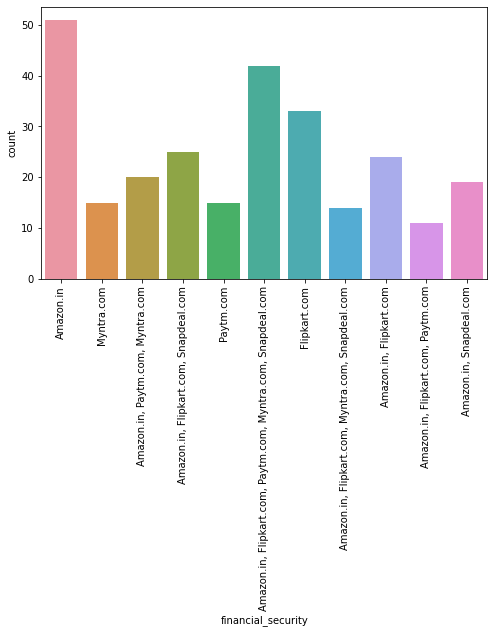

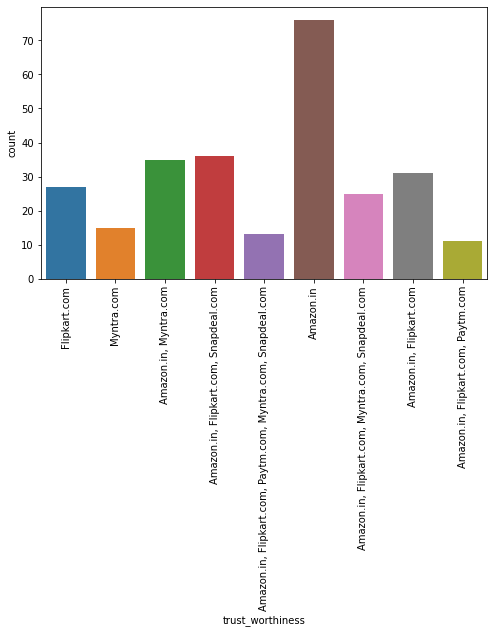

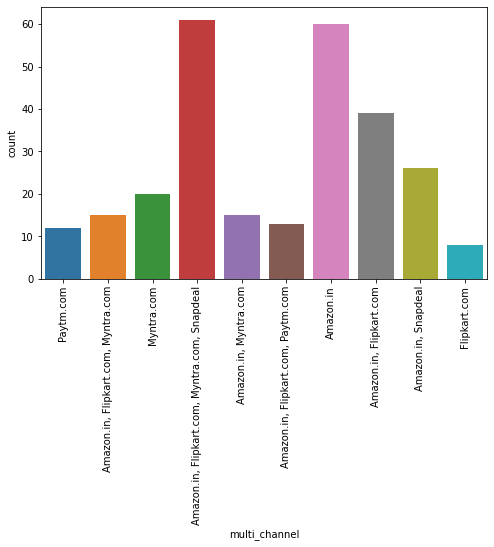

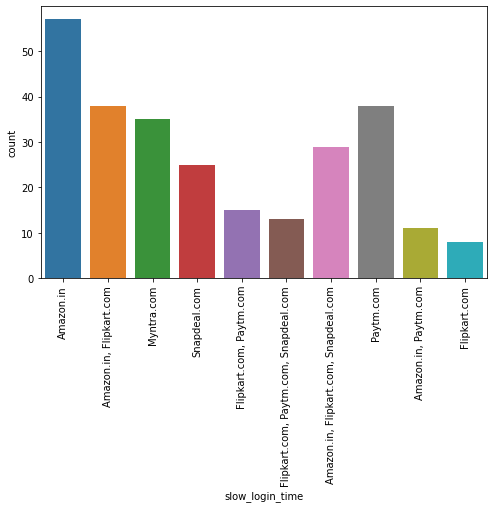

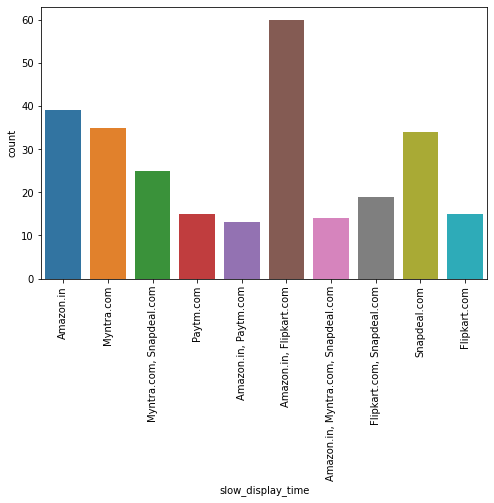

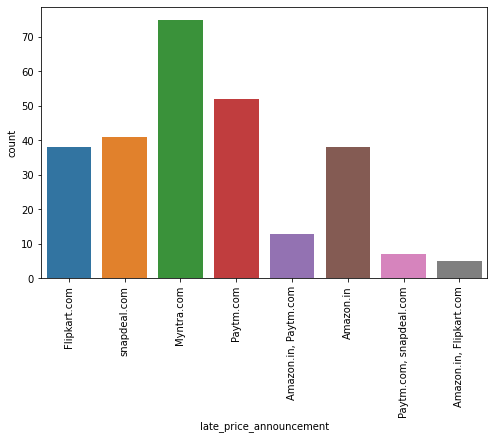

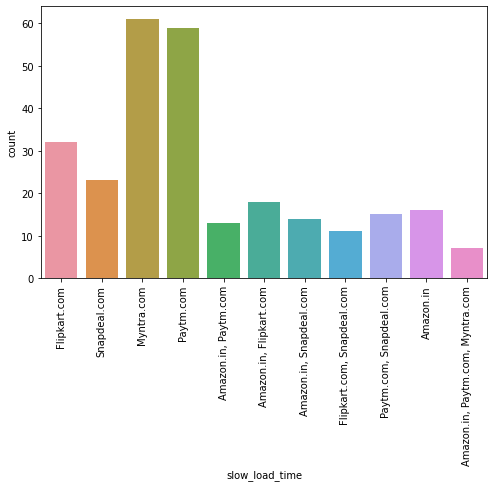

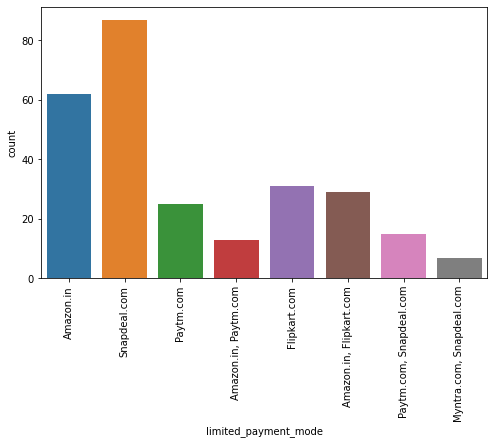

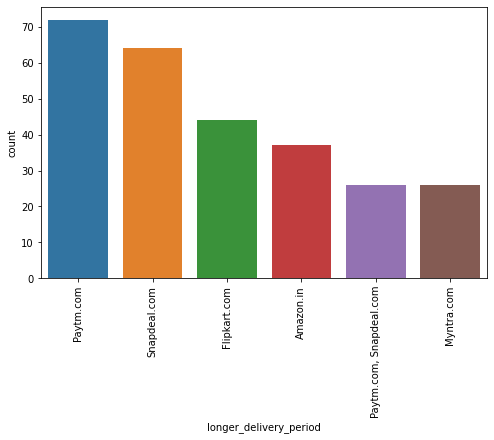

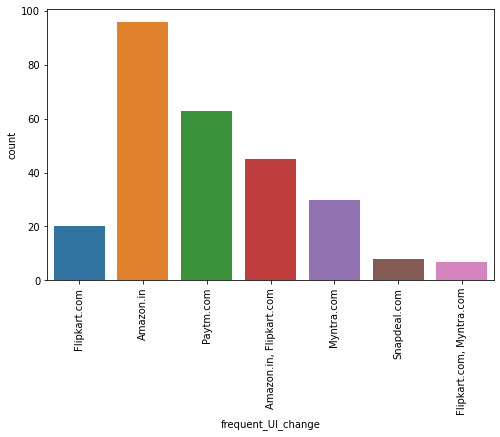

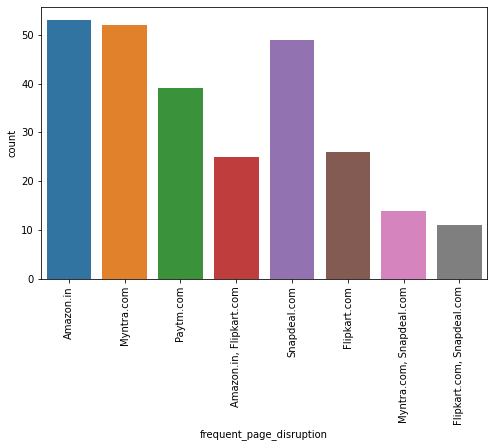

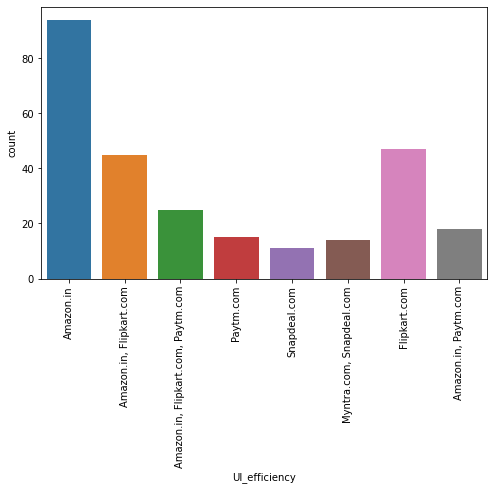

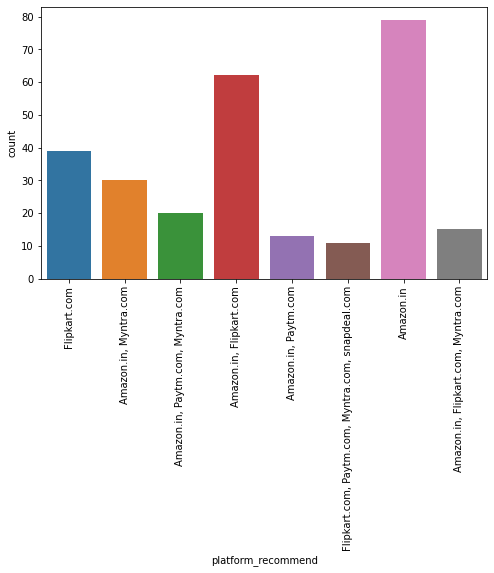

In [53]:
lis=['platform_Used','convinient_accessibility','Appealing_UI','product_diversity','product_info','performance_platform','reliable_UI',
         'navigation','payment_mode_availability','speed_delivery','customer_privacy','financial_security','trust_worthiness',
        'multi_channel','slow_login_time','slow_display_time','late_price_announcement','slow_load_time','limited_payment_mode',
         'longer_delivery_period','frequent_UI_change','frequent_page_disruption','UI_efficiency','platform_recommend']
for i in lis:
    plt.figure(figsize=(8,5))
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

# Observation from the above graphs:
# In terms of 'platform_Used','convinient_accessibility','Appealing_UI','product_diversity' people strongly prefer amazon and flipkart for online purchases as the user interface is very easy to understand and there are variety of products provided and product diversity is good and it helps in customer satisfaction and these platforms are most used and trusted by the people.
# People trust amazon in terms of data privacy and finacial security and over all trust worthiness followed by flipkart and mytra.
# flipkart tops in fastest login time
# myntra and snapdeal are slow in loading the website compared to other platforms.
# PayTm is very slow in delivery of the products and amazon is the fastest 
# People are most likely to recommend amazon and flipkart for making online purchases to other people.

# CUSTOMER RETENTION

# From above we can see that when user has used all the platform he is never recommending Snapdeal.¶
# Amazon & flipkart are most recommended.
# Fast speed of delivery and fast loading speed, login time is also one of the factors that leads to customer retention.
# Better Customers support helps people in retention of customers.
# loyalty programs, discounts and monetory benefits helps customers to find value for money products and are most likely to reccomed the platform to other people.
# People wants ease of navigation for finding products, good connectivity, user interface should be easy to understand and covenient payment methods.
# Product details and images of the product should be clearly mentioned as well as return policy is what a customer checks before ordering any product online which help the customer to trust the platform.
# Keeping the private data and giving financial data security helps the customer to build a trust a factor towards the particular platform.
# Assisting the customers on time and providing wide range of products with variety will keep the customer on the platform for longer period.
# Good payment gateway helps the customer in making payments easily also providing EMI services will help them to buy more products.
# Appealing User interface helps the customers to browse the platform easily and find products faster which helps in Customer Satisfaction.


# Conclusion

# Amazon and Flipkart are most used and recommended platforms.
# These platforms have higher rating in every terms.
# Amazon and flipkart are the ones which has higher chances of customer activation and recommendation.¶
# Rest all platforms should be improved or their existing users are going their platforms.
# People wants to see the return and replacement policy to be mentioned cleary and in detail before taking their decison, information of the products should be easily understandable is what improves customer satisfaction and giving them access to loyalty programs will help in customer retention. Amazaon and flipkart are already better in these terms and other platforms are getting better day by day.
# we can see the majority of online shoppers on the female side and most number online female shoppers comes from under 21-30 age group and for male the majority shoppers comes from 31-40 age group.
# Most of the people are shopping since more than 4 years and platforms are using aggresive discounts and advertising to attract customers.
# People trust Amazon and flipkart for keeping their data safe but other platforms are also building trust factor with their customers and they are getting better day by day.
# Ease of navigation and finding value for money product is what a customers tries to find on a platform and Amazon is very good in these terms.
# Amazon and flipkart are the oldest platforms hence people first preferece is amazon and flipkart and mostly recommended.
# People tend to buy more products if there are more discounts and better EMI services.
